## Helpers

Pour récupérer la liste des codes EAN en ligne en fonction du nom du produit, vous pouvez utiliser des bibliothèques Python telles que Requests et Beautiful Soup pour effectuer une requête HTTP et extraire les informations nécessaires à partir d'une page web. Voici un exemple de code qui utilise ces bibliothèques :

In [4]:
import requests
from bs4 import BeautifulSoup

def get_ean_codes_by_product_name(product_name):
    # Effectuer une requête de recherche sur un site en ligne
    search_url = "https://www.example.com/search?q=" + product_name
    response = requests.get(search_url)
    
    # Vérifier si la requête s'est bien déroulée
    if response.status_code == 200:
        # Analyser le contenu HTML de la page de résultats
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Trouver les éléments de la page contenant les codes EAN
        ean_elements = soup.find_all('span', class_='ean')
        
        # Extraire les codes EAN de ces éléments
        ean_codes = [element.text for element in ean_elements]
        
        return ean_codes
    else:
        print("La requête de recherche a échoué.")
        return []

# Exemple d'utilisation
product_name = "Nivea"
ean_list = get_ean_codes_by_product_name(product_name)

if ean_list:
    print("Codes EAN trouvés :")
    for ean in ean_list:
        print(ean)
else:
    print("Aucun code EAN trouvé pour ce produit.")


La requête de recherche a échoué.
Aucun code EAN trouvé pour ce produit.


In [7]:
import requests
from bs4 import BeautifulSoup

def search_ean_by_product_name(product_name, site_url):
    search_url = site_url + product_name
    response = requests.get(search_url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        ean_elements = soup.find_all('span', class_='ean')

        ean_codes = [element.text for element in ean_elements]
        return ean_codes
    else:
        print(f"La requête de recherche a échoué pour {site_url}")

# Liste des sites web à parcourir
websites = {
    "EAN-search": "https://www.ean-search.org/?q="
    # "Amazon": "https://www.amazon.fr/s?k=",
    # "eBay": "https://www.ebay.com",
    # "Google Shopping": "https://shopping.google.com",
    # "GS1 Global Data Hub": "https://www.gs1.org",
    # "Walmart": "https://www.walmart.com",
    # "Target": "https://www.target.com",
    # "Best Buy": "https://www.bestbuy.com"
}

# Nom du produit à rechercher
product_name = "axe"

# Parcourir les sites web et chercher les codes EAN
for site_name, site_url in websites.items():
    ean_list = search_ean_by_product_name(product_name, site_url)
    
    if ean_list:
        print(f"Codes EAN trouvés sur {site_name}:")
        for ean in ean_list:
            print(ean)
    else:
        print(f"Aucun code EAN trouvé sur {site_name}.")



La requête de recherche a échoué pour https://www.amazon.fr/s?k=
Aucun code EAN trouvé sur Amazon.


ConnectionError: HTTPSConnectionPool(host='www.ebay.comaxe', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002362EFFCAF0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [87]:
audio_file = "Audio2.wav"

# Importation de l'audio vers un vecteur de signal:
fe,signal=wav.read(audio_file)
signal = (signal / 32767)
print("Imported audio file (signal, fe):")
display(signal)
fe_k = fe/1e3
print("- fréquence d'echantianage = {fe} Hz ({fe_k} kHz)".format(**locals()))

# durée de signa:
N = len(signal)
duration = N/fe
print("- Durée de signal = {duration} seconds".format(**locals()))

Te=1/fe
print("- periode d'echantianage = {Te} seconds ".format(**locals()))


Imported audio file (signal, fe):


array([-0.17569506,  0.0126957 ,  0.00894192, ...,  0.13797418,
        0.10177923, -0.09149449])

- fréquence d'echantianage = 8000 Hz (8.0 kHz)
- Durée de signal = 2.03175 seconds
- periode d'echantianage = 0.000125 seconds 


In [88]:
# vecteur de temps comme: t=(0:N-1)*Te
t = np.arange(start=0, stop=N, step=1)*Te

display(t)


array([0.000000e+00, 1.250000e-04, 2.500000e-04, ..., 2.031375e+00,
       2.031500e+00, 2.031625e+00])

In [89]:
# X=fftshift(fft(x));
X = np.fft.fftshift( np.fft.fft(signal) )
display(X)

array([  2.95617542-1.77635684e-15j,  10.48465242+2.22938267e+01j,
       -44.47923472+2.38431439e+01j, ..., -31.00578336-7.57902182e+00j,
       -44.47923472-2.38431439e+01j,  10.48465242-2.22938267e+01j])

In [90]:
# if mod(N,2)==0 fk=-N/2:N/2-1;
# else fk=-(N-1)/2:(N-1)/2;
# end

if N % 2 == 0:
    fk = np.arange(start=-N/2, stop=N/2, step=1)*fe_k
else:
    fk = np.arange(start=-(N-1)/2, stop=(N)/2, step=1)*fe_k
    
display(fk)

array([-65016., -65008., -65000., ...,  64992.,  65000.,  65008.])

## Plot audio signal

Text(0, 0.5, 'Domaine fréquantiel')

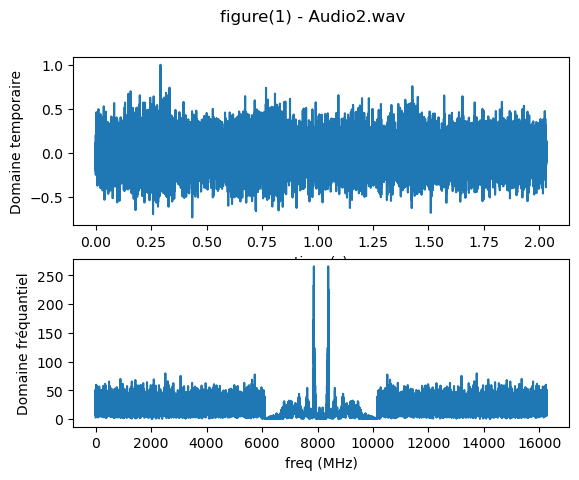

In [106]:
# figure(1);
# subplot(2,1,1),plot(x)
# subplot(2,1,2),plot(fk,abs(X))

fig, axs = plt.subplots(2)
fig.suptitle('figure(1) - ' + audio_file)
axs[0].plot(t, signal)
axs[0].set_xlabel('time (s)')
axs[0].set_ylabel('Domaine temporaire')

axs[1].plot( abs(X))
axs[1].set_xlabel('freq (MHz)')
axs[1].set_ylabel('Domaine fréquantiel')

## Filtrage

Text(0.5, 1.0, 'Figure(2) - Filtre')

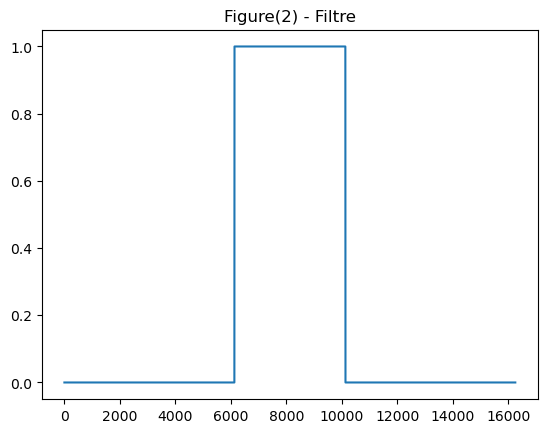

In [95]:
# kc=2000;
kc = 2000


#  % FILTRE
# if size(x,2)==1
#   x=x'
# end

# ko=ceil((N+1)/2);
ko = ceil((N+1)/2)

# Hb=zeros(1,N);
Hb = np.zeros(N)

# Hb(ko-kc:ko+kc)=1;
Hb[ko-kc:ko+kc]=1

# Xb=fftshift(fft(x));
Xb = np.fft.fftshift( np.fft.fft(signal) )

# xbf=Hb.*Xb;
xbf = Hb * Xb

# xf=ifft(ifftshift(xbf));
xf = np.fft.ifft( np.fft.ifftshift(xbf) )

# figure(2);
# plot(Hb)
plt.plot(Hb)
plt.title('Figure(2) - Filtre')
# plt.xlabel('time (s)')
# plt.ylabel('voltage (mV)')


Text(0, 0.5, 'Signal filtré')

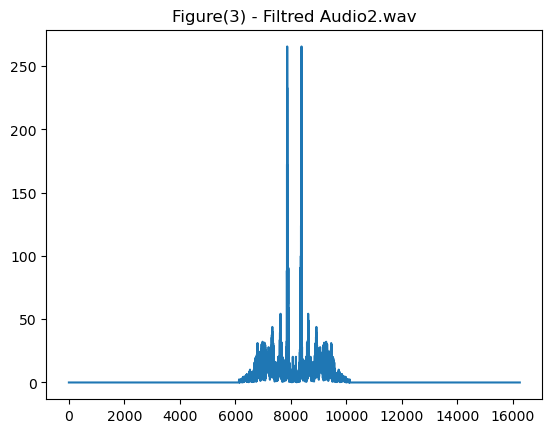

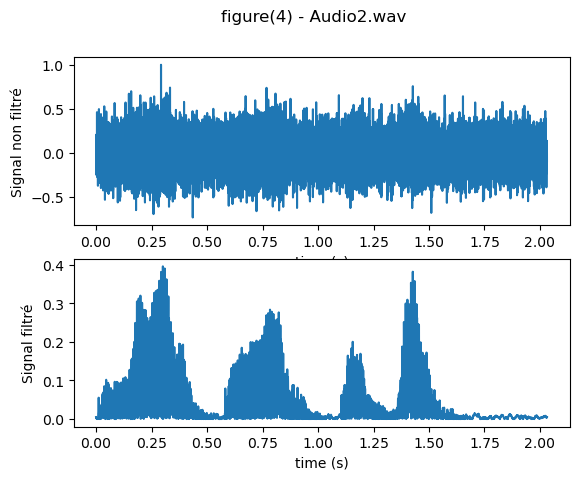

In [98]:
# Xbf=fftshift(fft(xf));
Xbf =  np.fft.fftshift( np.fft.fft(xf) )


# figure(3)
# plot(abs(Xbf))
plt.plot(abs(Xbf))
plt.title('Figure(3) - Filtred ' + audio_file)

# figure(4)
# subplot(2,1,1),plot(x),subplot(2,1,2),plot(abs(xf))
fig, axs = plt.subplots(2)
fig.suptitle('figure(4) - ' + audio_file)
axs[0].plot(t, signal)
axs[0].set_xlabel('time (s)')
axs[0].set_ylabel('Signal non filtré')

axs[1].plot(t, abs(xf))
axs[1].set_xlabel('time (s)')
axs[1].set_ylabel('Signal filtré')


# sound(10*xf)



In [105]:
rate = fe
data = np.random.uniform(-1, 1, rate) # 1 second worth of random samples between -1 and 1
scaled = np.int16(xf / np.max(np.abs(xf)) * 32767)
ff_name = audio_file.split(".")
write(ff_name[0]+"-filtrer.wav", rate, scaled)

C:\Users\rnwin\AppData\Local\Temp\ipykernel_5968\3550381790.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  scaled = np.int16(xf / np.max(np.abs(xf)) * 32767)
